In [77]:
### import packages

import sys
import random
from importlib import reload
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pandas as pd
from PIL import Image
from IPython.display import clear_output
from IPython.core.pylabtools import figsize, getfigs
import svgpathtools
import os.path
from collections import Counter
import svg_rendering_helpers as srh
import matplotlib


from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# directory & file hierarchy
proj_dir = os.path.abspath('..')
code_dir = os.getcwd()
plot_dir = os.path.join(proj_dir,'plots')
data_dir = os.path.join(proj_dir,'data')


if not os.path.exists(code_dir):
    os.makedirs(code_dir)
    
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
    
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    
# if svg_rendering_helpers.py not in sys.path:
#     sys.path.append(os.path.join(proj_dir,svg_rendering_helpers.py)) 

### 2AFC Turing Test

In [189]:
afc_df = pd.read_csv(os.path.join(data_dir, 'BPL_turing_test_results.csv'))
q_string = 'Which is the human drawing?'

In [190]:
columns={}
for i in range(7):
    if i>0:
        columns[q_string+'.{}'.format(i)]=i
    else:
        columns[q_string] = i
            
    

In [191]:
q_columns = range(7)

In [192]:
afc_df=afc_df.rename(columns=columns)
answer_key = {
    0:7983,
    1:7090,
    2:6179,
    3:2968,
    4:3895,
    5:4934,
    6:5574,
}

array([0.82352941, 0.70588235, 1.        , 0.58823529, 1.        ,
       0.52941176, 0.88235294])

0.7899159663865546

In [193]:
for i in range(7):
    afc_df[i] = afc_df[i]==answer_key[i]
    

In [289]:
mean_acc = np.mean(np.array(afc_df[q_columns]))
std_acc = np.std(np.array(afc_df[q_columns]))
mean_accs = np.mean(np.array(afc_df[q_columns]), axis=0)
std_accs = np.std(np.array(afc_df[q_columns]), axis=0)
x = ["mean accuracy"]
y= [0,0,mean_acc,0,0]
err= [0,0,std_acc,0,0]
x_pos = [i for i, _ in enumerate(y)]


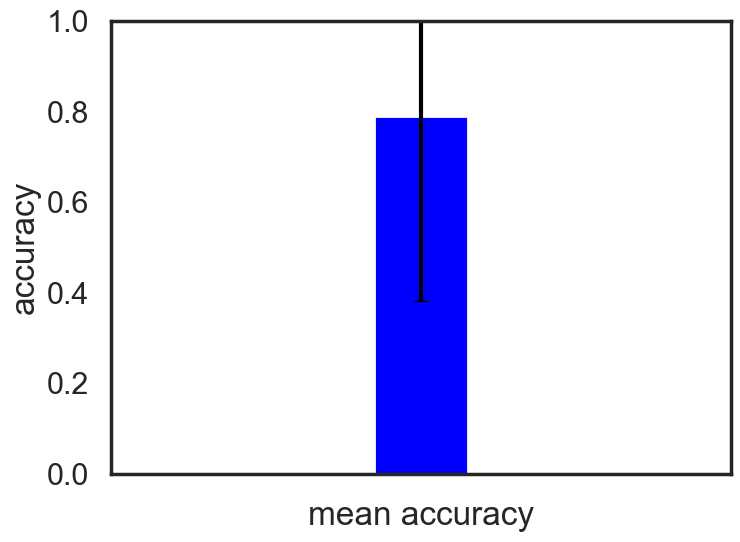

In [290]:
from matplotlib.pyplot import figure
%matplotlib inline
h = figure(figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

plt.bar(x_pos,y,color='blue',yerr=err, capsize=5)
plt.ylabel("accuracy")
axes = plt.gca()
axes.set_ylim([0,1])
axes.set_xticklabels([])
axes.set_xlabel('mean accuracy')
plt.savefig(os.path.join(plot_dir,'turing_test_mean_acc.png'),bbox_inches = 'tight')
plt.show()

In [291]:

y= mean_accs
err= std_accs
x_pos = [i for i, _ in enumerate(y)]


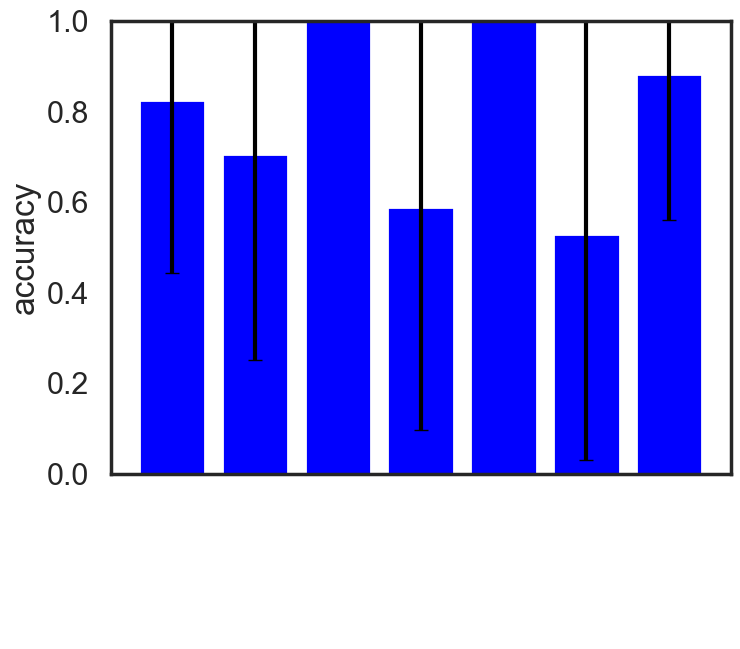

In [293]:
from matplotlib.pyplot import figure
%matplotlib inline
h = figure(figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

plt.bar(x_pos,y,color='blue',yerr=err, capsize=5)
plt.ylabel("accuracy")
axes = plt.gca()
axes.set_ylim([0,1])
axes.set_xticklabels([])
axes.set_xlabel('\n \n \n')
plt.savefig(os.path.join(plot_dir,'turing_test_mean_acc_q.png'),bbox_inches = 'tight')
plt.show()

In [295]:
y

array([0.82352941, 0.70588235, 1.        , 0.58823529, 1.        ,
       0.52941176, 0.88235294])

In [22]:
feats  = pd.DataFrame(np.load(os.path.join(data_dir,'BPL_sketches/features/BPLtest.npy')))
feats.reset_index()
feat_cols = feats.columns
meta = pd.read_csv(os.path.join(data_dir,'BPL_sketches/features/BPLtest_meta.csv'))

In [12]:
full_df = pd.concat((meta,feats),axis=1).drop(columns = ['feature_ind'])

In [47]:
full_df

,sketch_id,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,1_test,0.999916,-0.408248,-1.191745,1.759236,0.0,0.0,-0.792949,0.0,0.0,...,1.826161,-0.584362,0.0,0.689174,0.0,2.163335,0.0,0.0,0.804250,1.419676
1,2_test,-0.093092,-0.408248,-1.562693,-0.629324,0.0,0.0,0.365202,0.0,0.0,...,-1.005667,1.506459,0.0,2.202801,0.0,-0.400054,0.0,0.0,2.147292,-0.363346
2,3_test,-0.896898,-0.408248,1.202528,-0.629324,0.0,0.0,-0.792949,0.0,0.0,...,-1.398760,-0.967792,0.0,-0.578395,0.0,-0.629974,0.0,0.0,-0.590308,1.170156
3,4_test,0.961443,-0.408248,0.591467,-0.629324,0.0,0.0,-0.792949,0.0,0.0,...,0.169211,-0.532517,0.0,-0.578395,0.0,-0.629974,0.0,0.0,-0.590308,0.144845
4,5_test,0.375135,-0.408248,0.207799,-0.629324,0.0,0.0,-0.792949,0.0,0.0,...,0.287136,1.466126,0.0,-0.578395,0.0,-0.629974,0.0,0.0,-0.590308,-1.048594
5,6_test,0.594707,-0.408248,-0.336212,-0.629324,0.0,0.0,0.948841,0.0,0.0,...,-0.476967,-1.003056,0.0,-0.578395,0.0,-0.629974,0.0,0.0,-0.590308,0.201153
6,full,-1.941211,2.449490,1.088856,1.387387,0.0,0.0,1.857755,0.0,0.0,...,0.598885,0.115142,0.0,-0.578395,0.0,0.756616,0.0,0.0,-0.590308,-1.523892


In [42]:
from scipy.spatial.distance import pdist, squareform

#dmat = np.corrcoef(full_df[feat_cols])
dmat = pdist(full_df[feat_cols], metric='euclidean')
dmat = squareform(dmat)

In [69]:
full_df

,sketch_id,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,1_test,0.999916,-0.408248,-1.191745,1.759236,0.0,0.0,-0.792949,0.0,0.0,...,1.826161,-0.584362,0.0,0.689174,0.0,2.163335,0.0,0.0,0.804250,1.419676
1,2_test,-0.093092,-0.408248,-1.562693,-0.629324,0.0,0.0,0.365202,0.0,0.0,...,-1.005667,1.506459,0.0,2.202801,0.0,-0.400054,0.0,0.0,2.147292,-0.363346
2,3_test,-0.896898,-0.408248,1.202528,-0.629324,0.0,0.0,-0.792949,0.0,0.0,...,-1.398760,-0.967792,0.0,-0.578395,0.0,-0.629974,0.0,0.0,-0.590308,1.170156
3,4_test,0.961443,-0.408248,0.591467,-0.629324,0.0,0.0,-0.792949,0.0,0.0,...,0.169211,-0.532517,0.0,-0.578395,0.0,-0.629974,0.0,0.0,-0.590308,0.144845
4,5_test,0.375135,-0.408248,0.207799,-0.629324,0.0,0.0,-0.792949,0.0,0.0,...,0.287136,1.466126,0.0,-0.578395,0.0,-0.629974,0.0,0.0,-0.590308,-1.048594
5,6_test,0.594707,-0.408248,-0.336212,-0.629324,0.0,0.0,0.948841,0.0,0.0,...,-0.476967,-1.003056,0.0,-0.578395,0.0,-0.629974,0.0,0.0,-0.590308,0.201153
6,full,-1.941211,2.449490,1.088856,1.387387,0.0,0.0,1.857755,0.0,0.0,...,0.598885,0.115142,0.0,-0.578395,0.0,0.756616,0.0,0.0,-0.590308,-1.523892


<Figure size 576x576 with 0 Axes>

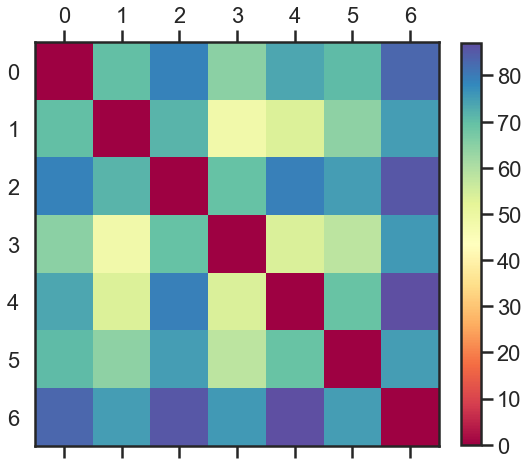

In [46]:
plt.figure(figsize(8,8))
plt.matshow(dmat, cmap=plt.cm.Spectral)
plt.colorbar(fraction=0.045)

In [53]:
np.mean(dmat[6,0:5])

81.23108944971743

In [70]:
_feats  = pd.DataFrame(np.load(os.path.join(data_dir,'BPL_sketches/features/groundtruth.npy')))
_feats.reset_index()
_feat_cols = _feats.columns
_meta = pd.read_csv(os.path.join(data_dir,'BPL_sketches/features/groundtruth_meta.csv'))

In [71]:
_full_df = pd.concat((_meta,_feats),axis=1).drop(columns = ['feature_ind'])

In [72]:
_dmat = pdist(_full_df[_feat_cols], metric='euclidean')
_dmat = squareform(_dmat)

<Figure size 576x576 with 0 Axes>

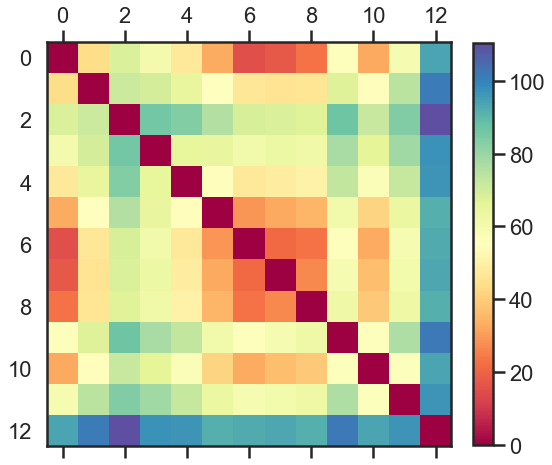

In [73]:
plt.figure(figsize(8,8))
plt.matshow(_dmat, cmap=plt.cm.Spectral)
plt.colorbar(fraction=0.045)

In [75]:
np.mean(dmat[0,1:12])

73.49163924154429

In [64]:
_full_df

,sketch_id,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0647-bfcd78e5-085c-4631-a47c-0f3dadf71345_3,0.280873,-0.444360,-0.431003,0.0,0.0,0.0,0.973823,0.0,0.0,...,-0.297078,0.881049,0.0,0.921438,0.0,-0.440358,0.0,0.0,0.0,-0.599911
1,0647-bfcd78e5-085c-4631-a47c-0f3dadf71345_3_ar...,-0.111828,1.052277,-0.583771,0.0,0.0,0.0,1.254360,0.0,0.0,...,0.701769,-1.035147,0.0,-0.912059,0.0,-0.888686,0.0,0.0,0.0,-0.574866
2,0647-bfcd78e5-085c-4631-a47c-0f3dadf71345_3_ar...,2.181776,0.959790,-0.640483,0.0,0.0,0.0,-1.472225,0.0,0.0,...,2.149857,0.748644,0.0,-0.912059,0.0,1.588916,0.0,0.0,0.0,-0.780043
3,0647-bfcd78e5-085c-4631-a47c-0f3dadf71345_3_ba...,-0.732543,-1.168712,-0.640483,0.0,0.0,0.0,0.252316,0.0,0.0,...,-0.814211,-0.600955,0.0,-0.912059,0.0,1.934804,0.0,0.0,0.0,0.862453
4,0647-bfcd78e5-085c-4631-a47c-0f3dadf71345_3_ba...,-2.331785,-2.048660,-0.640483,0.0,0.0,0.0,-0.218864,0.0,0.0,...,-1.403192,-0.211260,0.0,-0.912059,0.0,-0.390308,0.0,0.0,0.0,2.106920
5,0647-bfcd78e5-085c-4631-a47c-0f3dadf71345_3_ba...,-0.600676,0.102390,-0.003318,0.0,0.0,0.0,-0.011878,0.0,0.0,...,-0.483633,0.556150,0.0,1.457530,0.0,-1.165785,0.0,0.0,0.0,0.067176
6,0647-bfcd78e5-085c-4631-a47c-0f3dadf71345_3_ba...,0.275769,-0.537338,-0.640483,0.0,0.0,0.0,1.032596,0.0,0.0,...,-0.588750,0.331935,0.0,0.082118,0.0,-0.433271,0.0,0.0,0.0,-0.161738
7,0647-bfcd78e5-085c-4631-a47c-0f3dadf71345_3_ba...,0.185274,-0.206130,-0.160454,0.0,0.0,0.0,0.805640,0.0,0.0,...,-0.239675,1.293936,0.0,1.234610,0.0,-0.743908,0.0,0.0,0.0,-0.216956
8,0647-bfcd78e5-085c-4631-a47c-0f3dadf71345_3_ba...,0.631003,-0.201097,-0.388013,0.0,0.0,0.0,0.755270,0.0,0.0,...,0.133546,0.254371,0.0,-0.197809,0.0,-0.284606,0.0,0.0,0.0,-0.585752
9,0647-bfcd78e5-085c-4631-a47c-0f3dadf71345_3_le...,0.133971,1.517830,-0.640483,0.0,0.0,0.0,-0.099772,0.0,0.0,...,-0.221103,0.303589,0.0,-0.912059,0.0,-0.924575,0.0,0.0,0.0,-0.909915


In [101]:
viridis_cmap = matplotlib.cm.get_cmap('viridis')
viridis_rgb = []
norm = matplotlib.colors.Normalize(vmin=0, vmax=255)

for i in range(0, 255):
    k = matplotlib.colors.colorConverter.to_rgb(viridis_cmap(norm(i)))
    viridis_rgb.append(k)

In [102]:
viridis_rgb = []
norm = matplotlib.colors.Normalize(vmin=0, vmax=255)

for i in range(0, 255):
    k = matplotlib.colors.colorConverter.to_rgb(viridis_cmap(norm(i)))
    viridis_rgb.append(k)